# Introduction

##### The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 1308passengers and crew aboard the ship, and more than 500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

## Objective

##### The aim of this project is to determine what factors contributed to the chances of survival, and what can we learn from the historical event. Through our investigation, we hope to gain a deeper understanding of the people who perished on the Titanic and reflect on the lessons we can learn from historical data to inform our understanding of the present and future.

### Importing libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

### reading data

In [2]:
# reading data
train_data = pd.read_csv('Titanic_train.csv')
test_data = pd.read_csv('Titanic_test.csv')
display(train_data.head(), train_data.shape, test_data.head(), test_data.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


(418, 11)

In [3]:
# copying data to another variable
df_train = train_data.copy()
df_test = test_data.copy()

In [4]:
# checking info of the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# checking info the test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


### Observations

- There are 5 object type columns (Name, Sex, Ticket, Cabin and Embarked)
- There are 3 columns with null values (Age, Cabin and Embarked)

#### Removing useless columns

PasengerId and Name won't contribute for predictive performace of the models, so i'll just drop them entirely

In [5]:
def useless_drop(df):
    """drops both PassengerId and Name columns from the dataframe"""
    df.drop(['PassengerId'], axis=1, inplace=True)
    df.drop(['Name'], axis=1, inplace=True)

In [7]:
useless_drop(df_train)
useless_drop(df_test)
display(df_train.head(), df_test.head())

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,3,male,27.0,0,0,315154,8.6625,NaN,S
4,3,female,22.0,1,1,3101298,12.2875,NaN,S


#### Exploring null values

In [8]:
# number of null values for each column
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [9]:
# percentage of null values in each column
df_train.isnull().sum()*100/len(df_train)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

### Observations:

- The 'Age' column has ~20% of missing values
- The 'Cabin' column has ~80% of missing values (way to high)
- The 'Embarked' column has ~0.2% of missing values

#### What to do with each of these columns?

##### For the Age column
- I can just fill the null values with the median age

##### For the Cabin column
- Since the majority of values in the column are null, I'll just drop the entire column

##### For the Embarked column
- I can just replace the null values by the mode of the column

In [10]:
# function to replace the null values
def null_filler(dataframe):
    dataframe['Age'] = dataframe['Age'].fillna(df_train['Age'].median())
    dataframe = dataframe.drop(['Cabin'], axis=1)
    dataframe['Embarked'] = dataframe['Embarked'].fillna(df_train['Embarked'].mode().loc[0])
    for column in dataframe.columns:
        if dataframe[column].isnull().sum() > 0:
            dataframe[column] = dataframe[column].fillna(df_train[column].mode().loc[0])
    return dataframe

In [11]:
# dealing with null values from df_train
df_train = null_filler(df_train)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [12]:
# dealing with null values from df_test
df_test = null_filler(df_test)
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### Exploratory Data Analysis (EDA)

In [13]:
num_var = df_train.select_dtypes(['float64', 'int64']).columns.tolist()
print(f'Numerical variables: {num_var}')
cat_var = df_train.select_dtypes(['object']).columns.tolist()
print(f'Categorical variables: {cat_var}')

Numerical variables: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical variables: ['Sex', 'Ticket', 'Embarked']


### Univariate Analysis

#### Numerical Variables

##### Survived

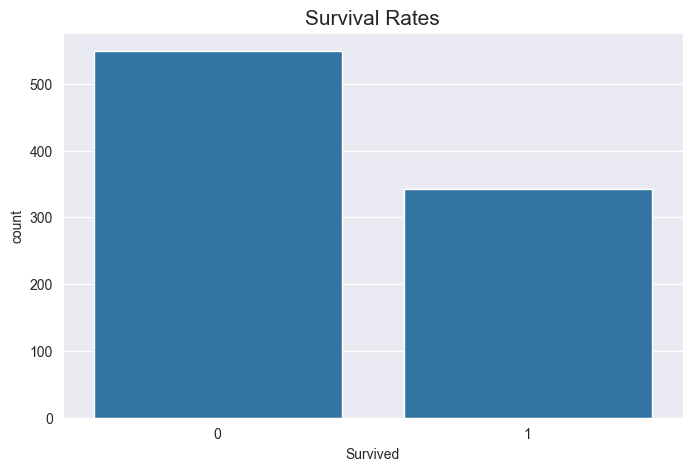

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='Survived', data=df_train)
plt.title('Survival Rates', size=15)
plt.show()

###### We can clearly see that most people didn't survive the disaster

### Pclass

In [15]:
pd.DataFrame(df_train['Pclass'].value_counts())

,count
Pclass,
3,491
1,216
2,184


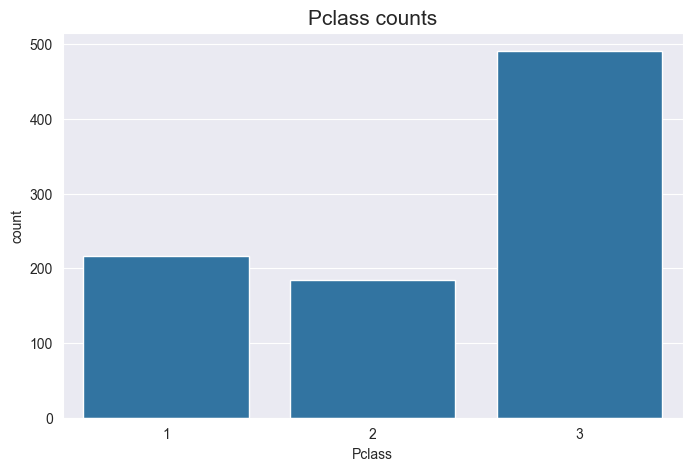

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='Pclass', data=df_train)
plt.title('Pclass counts', size=15)
plt.show()

##### There were much more passengers in Pclass 3

### Age

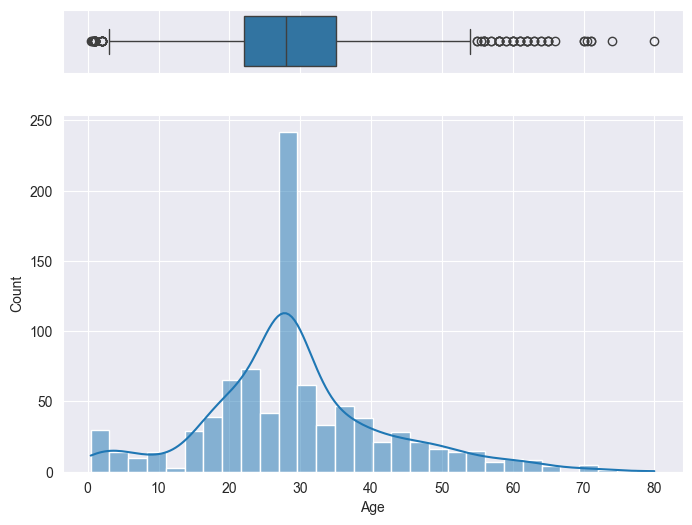

In [17]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(.15, .85)}, figsize=(8,6))
sns.boxplot(x='Age', data=df_train, ax=ax_box)
sns.histplot(x='Age', kde=True, data=df_train, ax=ax_hist)
plt.show()

- The age is the closest thing we have from a normal distribution
- Most passengers were between 20 and 40 years old
- There were over 200 passengers between 29 and 30 years old

### SibSp

In [18]:
pd.DataFrame(df_train['SibSp'].value_counts())

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


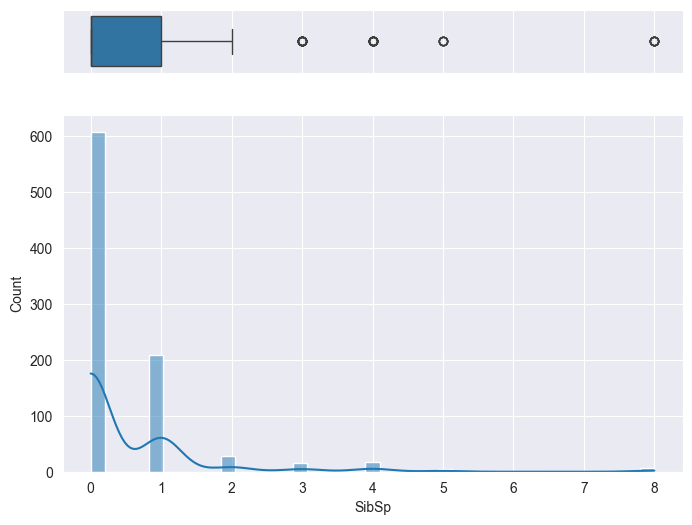

In [19]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(.15, .85)}, figsize=(8,6))
sns.boxplot(x='SibSp', data=df_train, ax=ax_box)
sns.histplot(x='SibSp', kde=True, data=df_train, ax=ax_hist)
plt.show()

In [ ]:
SibSp has a very right skewed distribution
SibSp = 0 has the biggest count, followed by 1 than 2 ....
SibSp has 4 outliers

### Parch

In [20]:
pd.DataFrame(df_train['Parch'].value_counts())

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


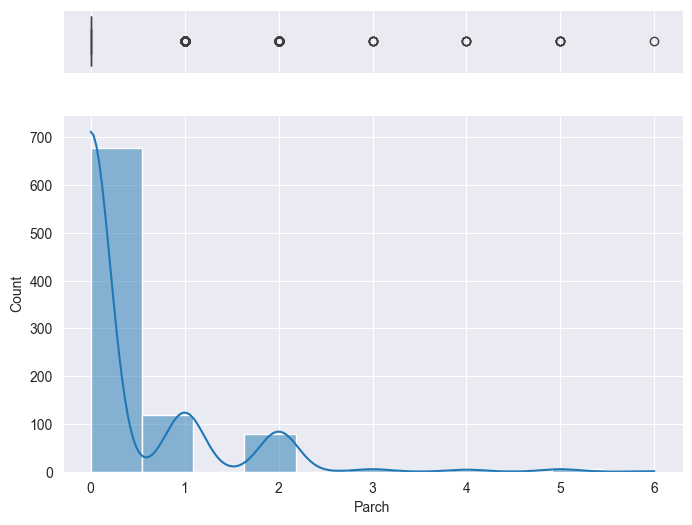

In [21]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(.15, .85)}, figsize=(8,6))
sns.boxplot(x='Parch', data=df_train, ax=ax_box)
sns.histplot(x='Parch', kde=True, data=df_train, ax=ax_hist)
plt.show()

##### Again, the Parch variable has a very right skewed distribution, with outliers in the right side

### Fare

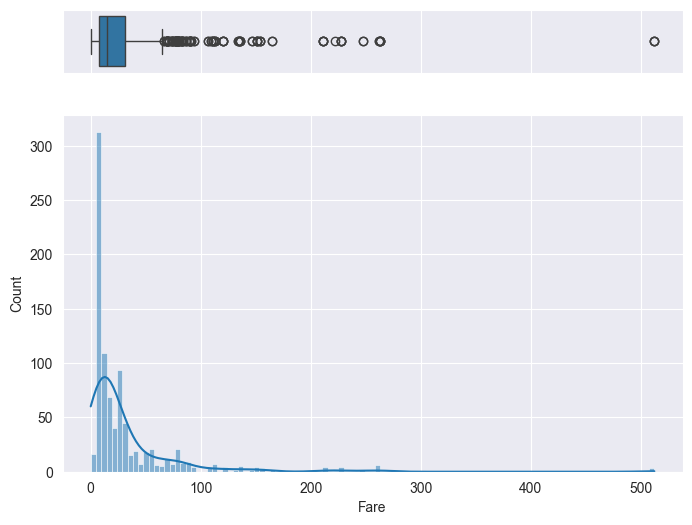

In [22]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios':(.15, .85)}, figsize=(8,6))
sns.boxplot(x='Fare', data=df_train, ax=ax_box)
sns.histplot(x='Fare', kde=True, data=df_train, ax=ax_hist)
plt.show()

- Once again, the Fare variable is very right skewed
- Most passengers where in low value fares
- There are quite a few outliers

### Categorical Variables

In [23]:
print(cat_var)

['Sex', 'Ticket', 'Embarked']


### Sex

In [25]:
pd.DataFrame(df_train['Sex'].value_counts())

,count
Sex,
male,577
female,314


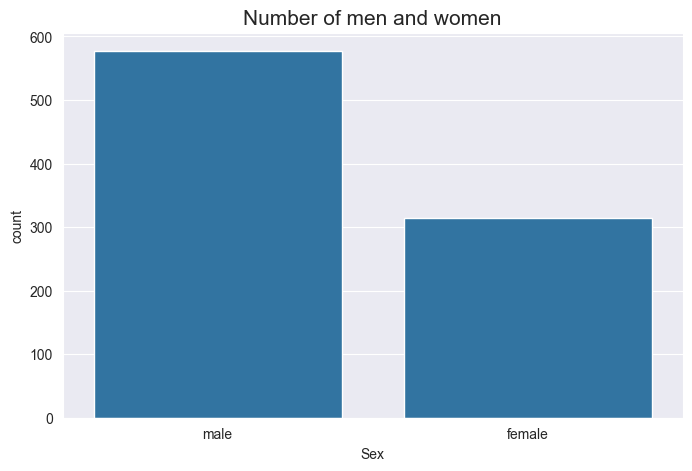

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x='Sex', data=df_train)
plt.title('Number of men and women', size=15)
plt.show()

##### We can see by the plot that there were much more men than womem in the titanic

### Ticket

In [27]:
pd.DataFrame(df_train['Ticket'].value_counts())

,count
Ticket,
347082,7
CA. 2343,7
1601,7
3101295,6
CA 2144,6
...,...
9234,1
19988,1
2693,1


## Bivariate Analysis

### Pclass and Survived

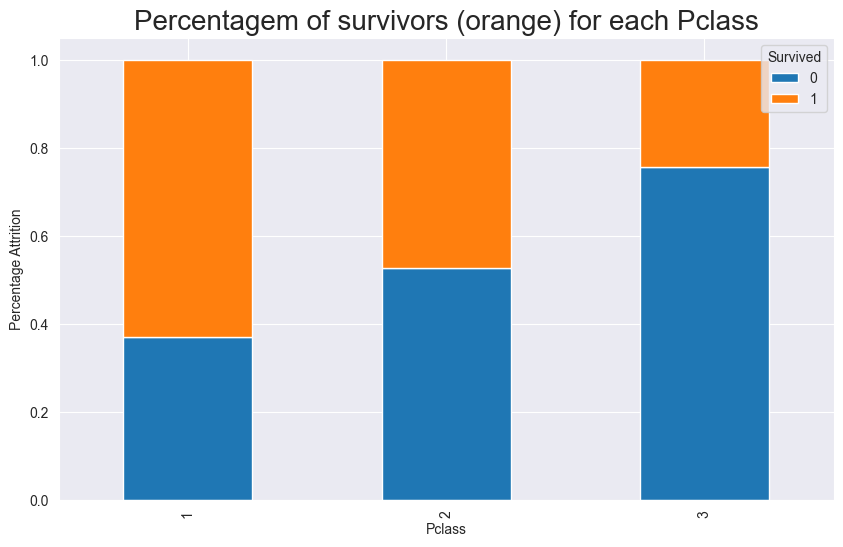

In [28]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], normalize='index').plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Percentagem of survivors (orange) for each Pclass', size=20)
plt.ylabel('Percentage Attrition')
plt.show()


- We can clearly see that passengers in class 1 had a much higher survival rate compared with class 1 and 2
- Only 20% of people in the Pclass 1 survived the disaster
- Pclass has a very high predictive performance

### Age and Survived

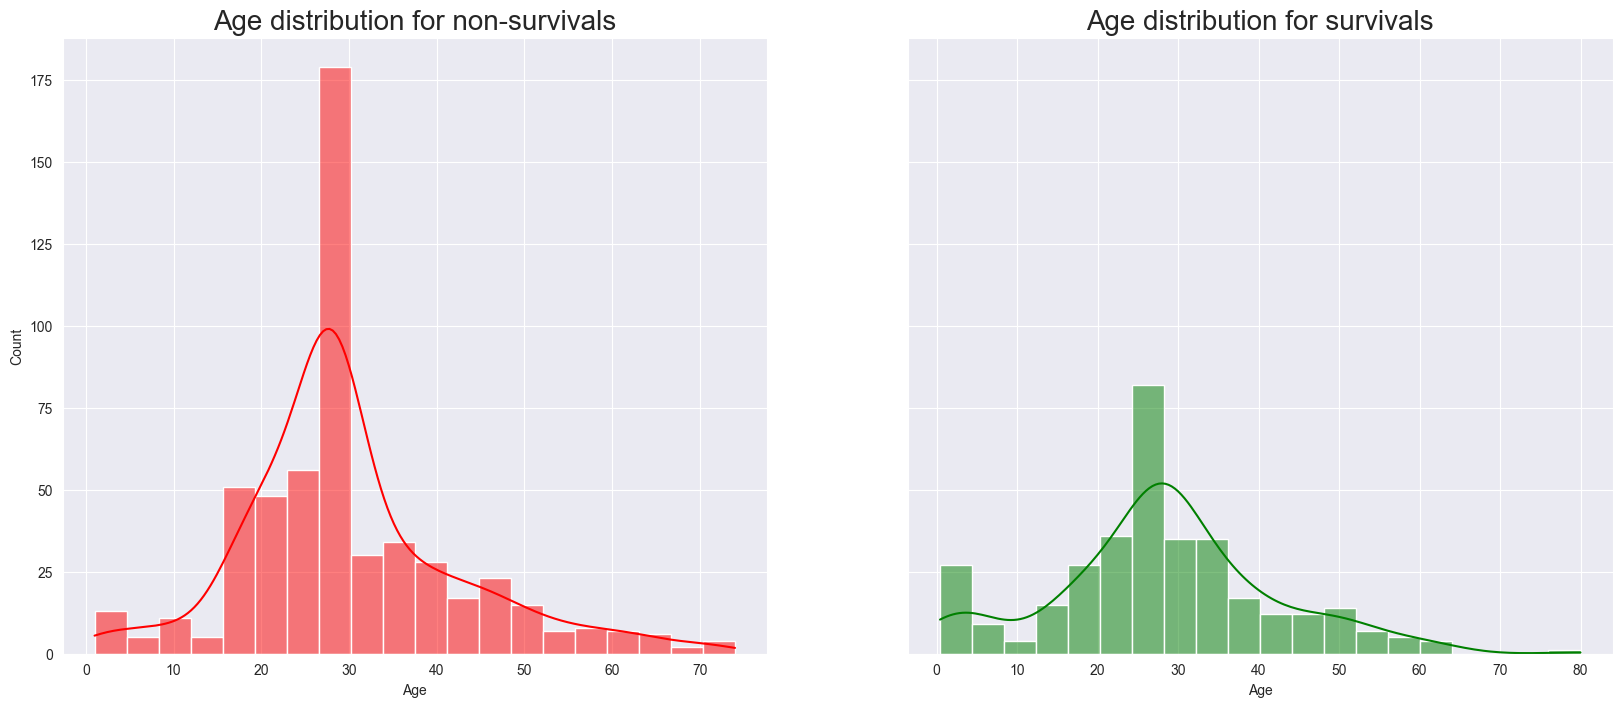

In [29]:
f, (ax_hist1, ax_hist2) = plt.subplots(1, 2, sharey='row', figsize=(20, 8))
sns.histplot(x=df_train[df_train['Survived']==0]['Age'], kde=True, bins=20, ax=ax_hist1, color='red')
ax_hist1.set_title('Age distribution for non-survivals', size=20)
sns.histplot(x=df_train[df_train['Survived']==1]['Age'], kde=True, bins=20, ax=ax_hist2, color='green')
ax_hist2.set_title('Age distribution for survivals', size=20)
plt.show()

- We can see that age doesn't impact the survival rate: both have a spike around 30 years old and have similar distribution
- Apparently, when you are in a catastrophic situation, you don't care if there are younger or older people than you, people just want to survive

### SibSp and Survived

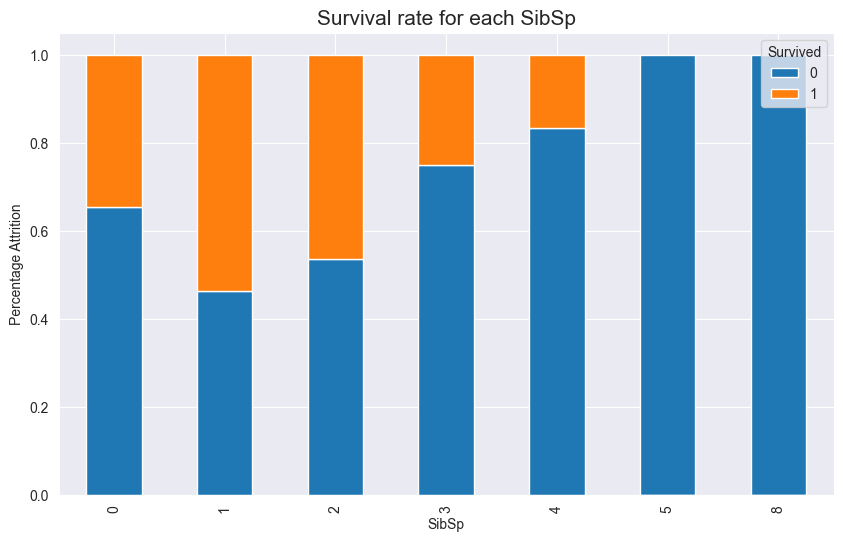

In [30]:
pd.crosstab(df_train['SibSp'], df_train['Survived'], normalize='index').plot(kind='bar', stacked=True, figsize=(10,6))
plt.ylabel('Percentage Attrition')
plt.title('Survival rate for each SibSp', size=15)
plt.show()

##### SibSps 0, 1 and 2 had relativity high survivel rates, when compared with the other sibsps

### Parch and Survived

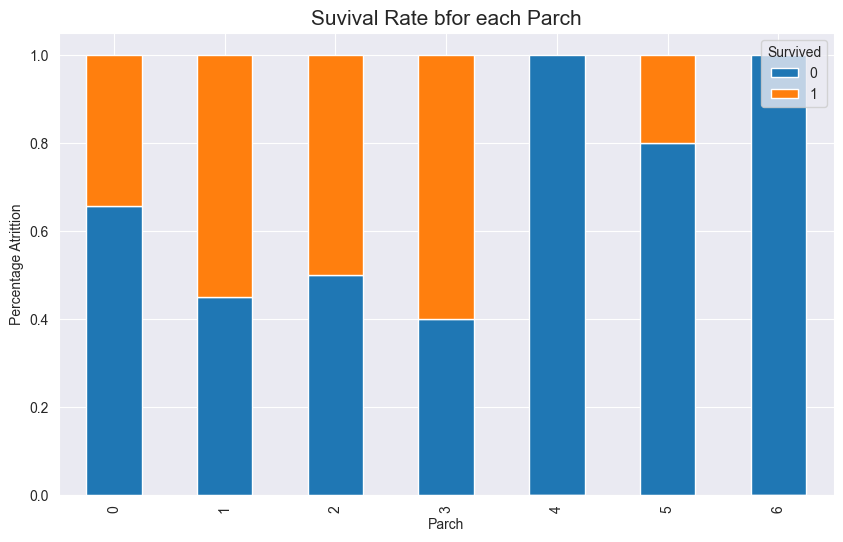

In [31]:
pd.crosstab(df_train['Parch'], df_train['Survived'], normalize='index').plot(kind='bar', stacked=True, figsize=(10,6))
plt.ylabel('Percentage Atrittion')
plt.title('Suvival Rate bfor each Parch', size=15)
plt.show()

##### Parchs 0-3 had a much higher survival rate compared to Parchs 4-6

### Fare and Survived

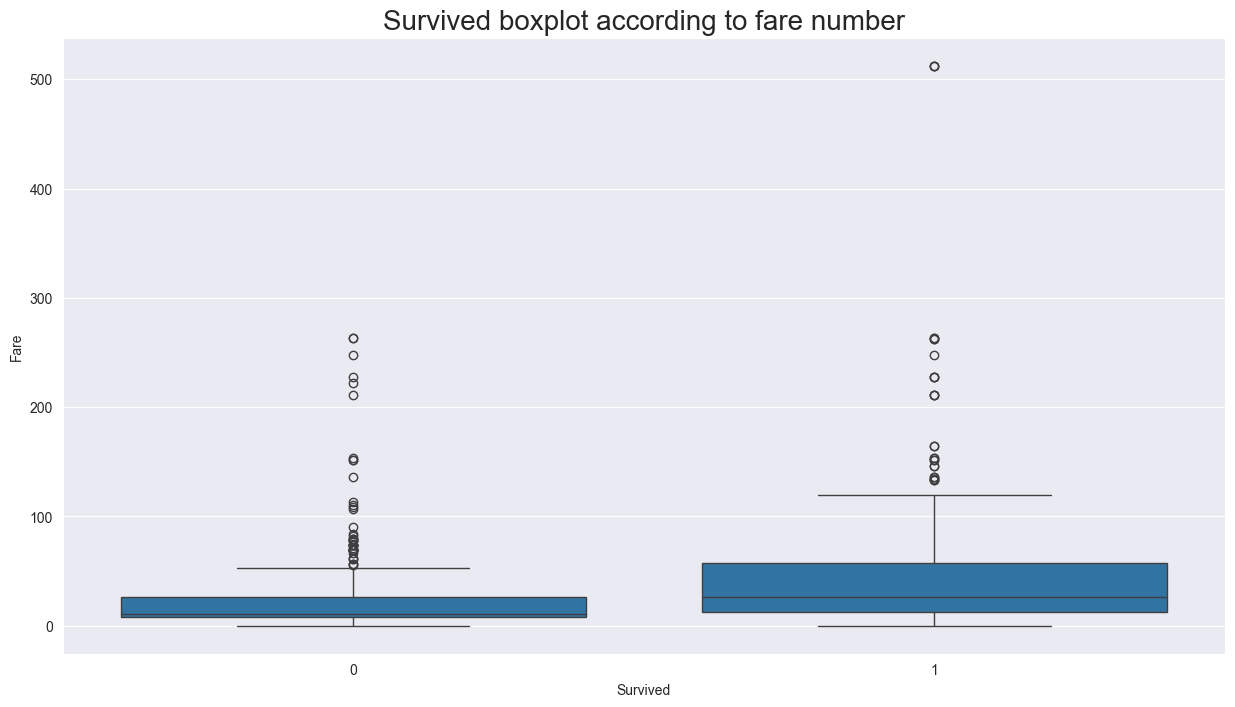

In [32]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Survived', y='Fare', data=df_train)
plt.title('Survived boxplot according to fare number', size=20)
plt.show()

##### Higher fare numbers tend to have a higher survival rate, but the difference is very small

### Embarked and Survived

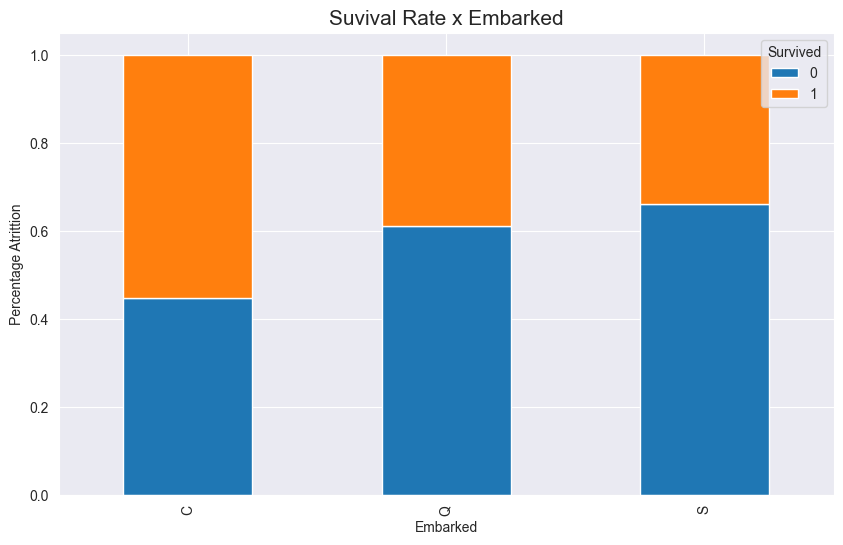

In [33]:
pd.crosstab(df_train['Embarked'], df_train['Survived'], normalize='index').plot(kind='bar', stacked=True, figsize=(10,6))
plt.ylabel('Percentage Atrittion')
plt.title('Suvival Rate x Embarked', size=15)
plt.show()

##### Passengers who embarked at C had a higher chance of survival compared with passengers that embarked in other places

### Sex and Survived

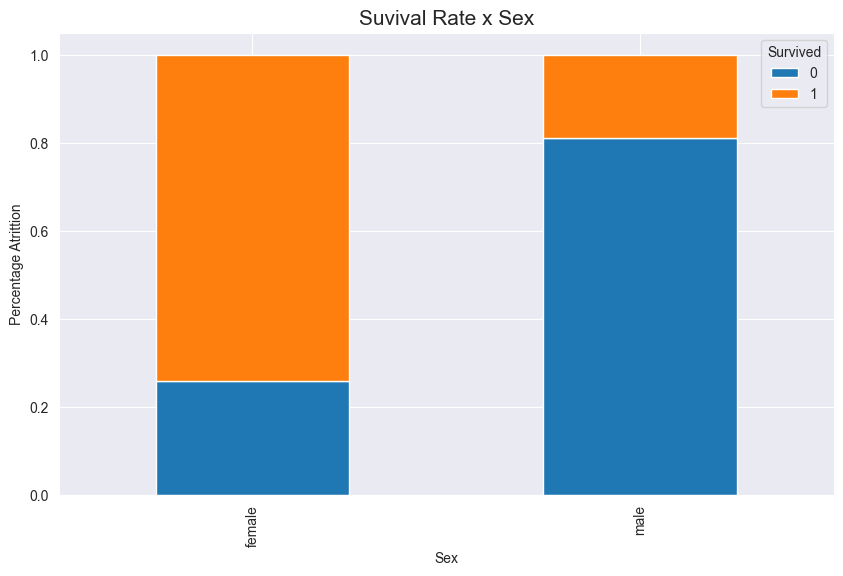

In [34]:
pd.crosstab(df_train['Sex'], df_train['Survived'], normalize='index').plot(kind='bar', stacked=True, figsize=(10,6))
plt.ylabel('Percentage Atrittion')
plt.title('Suvival Rate x Sex', size=15)
plt.show()

##### It's very clear that womam had a much higher chance of survival than men

## Multivariate Analysis

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(), annot=True, cmap='mako')
plt.show()

ValueError: could not convert string to float: 'male'

<Figure size 1500x1000 with 0 Axes>

##### There are some variables with high correlation, such as Pclass and Fare, Pclass and Age

### Investigating the Ticket column

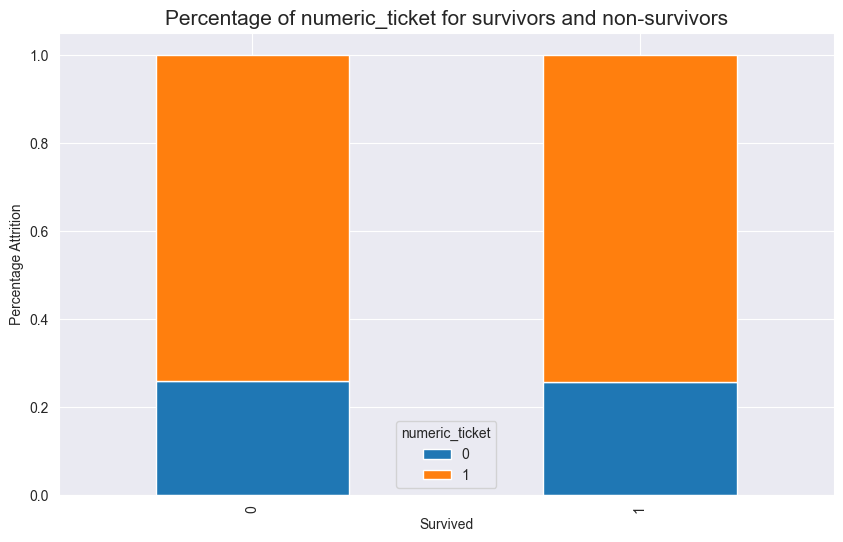

In [36]:
df_train['numeric_ticket'] = df_train.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df_train['non-numeric_ticket'] = df_train.Ticket.apply(lambda x: 1 if len(x.split(' ')[:-1]) >0 else 0)
pd.crosstab(df_train['Survived'], df_train['numeric_ticket'], normalize='index').plot(kind='bar', stacked=True, figsize=(10,6))
plt.ylabel('Percentage Attrition')
plt.title('Percentage of numeric_ticket for survivors and non-survivors', size=15)
plt.show()

- We can see that having a numeric ticket or not doesn't interfere on your chance of surviving
- We can just drop this column, because we have two new columns

In [37]:
# removing the ticket column for the train dataset
df_train.drop('Ticket', axis=1, inplace=True)
df_train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,numeric_ticket,non-numeric_ticket
0,0,3,male,22.0,1,0,7.2500,S,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,1
2,1,3,female,26.0,0,0,7.9250,S,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,0
4,0,3,male,35.0,0,0,8.0500,S,1,0


In [38]:
# doing the same for the test dataset
df_test['numeric_ticket'] = df_test.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
df_test['non-numeric_ticket'] = df_test.Ticket.apply(lambda x: 1 if len(x.split(' ')[:-1]) >0 else 0)
df_test.drop('Ticket', axis=1, inplace=True)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,numeric_ticket,non-numeric_ticket
0,3,male,34.5,0,0,7.8292,Q,1,0
1,3,female,47.0,1,0,7.0000,S,1,0
2,2,male,62.0,0,0,9.6875,Q,1,0
3,3,male,27.0,0,0,8.6625,S,1,0
4,3,female,22.0,1,1,12.2875,S,1,0


### Modeling
#### Data Preprocessing

In [39]:
# getting dummies on train data
df_train = pd.get_dummies(df_train)
display(df_train.head())

# getting dummies on test data
df_test = pd.get_dummies(df_test)
display(df_test.head())

,Survived,Pclass,Age,SibSp,Parch,Fare,numeric_ticket,non-numeric_ticket,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,0,1,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,0,1,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,1,0,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,1,0,False,True,False,False,True


,Pclass,Age,SibSp,Parch,Fare,numeric_ticket,non-numeric_ticket,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,0,False,True,False,True,False
1,3,47.0,1,0,7.0000,1,0,True,False,False,False,True
2,2,62.0,0,0,9.6875,1,0,False,True,False,True,False
3,3,27.0,0,0,8.6625,1,0,False,True,False,False,True
4,3,22.0,1,1,12.2875,1,0,True,False,False,False,True


In [40]:
Scaler = StandardScaler()
df_train_scaled = df_train.copy()
df_train_scaled[['Age', 'SibSp', 'Parch', 'Fare']] = Scaler.fit_transform(df_train_scaled[['Age', 'SibSp', 'Parch', 'Fare']])
display(df_train_scaled.head())

df_test_scaled = df_test.copy()
df_test_scaled[['Age', 'SibSp', 'Parch', 'Fare']] = Scaler.transform(df_test_scaled[['Age', 'SibSp', 'Parch', 'Fare']])
display(df_test_scaled.head())

,Survived,Pclass,Age,SibSp,Parch,Fare,numeric_ticket,non-numeric_ticket,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,-0.565736,0.432793,-0.473674,-0.502445,0,1,False,True,False,False,True
1,1,1,0.663861,0.432793,-0.473674,0.786845,0,1,True,False,True,False,False
2,1,3,-0.258337,-0.474545,-0.473674,-0.488854,0,1,True,False,False,False,True
3,1,1,0.433312,0.432793,-0.473674,0.420730,1,0,True,False,False,False,True
4,0,3,0.433312,-0.474545,-0.473674,-0.486337,1,0,False,True,False,False,True


,Pclass,Age,SibSp,Parch,Fare,numeric_ticket,non-numeric_ticket,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.394887,-0.474545,-0.473674,-0.490783,1,0,False,True,False,True,False
1,3,1.355510,0.432793,-0.473674,-0.507479,1,0,True,False,False,False,True
2,2,2.508257,-0.474545,-0.473674,-0.453367,1,0,False,True,False,True,False
3,3,-0.181487,-0.474545,-0.473674,-0.474005,1,0,False,True,False,False,True
4,3,-0.565736,0.432793,0.767630,-0.401017,1,0,True,False,False,False,True


In [41]:
x_train = df_train_scaled.drop('Survived', axis=1)
y_train = df_train_scaled['Survived']
x_test = df_test_scaled

### Creating Models

### SVM

In [42]:
svc = SVC(probability=True) 
cv = cross_val_score(svc, x_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.83240223 0.8258427  0.80898876 0.81460674 0.84831461]
0.826031008725127


### LogisticRegression

In [43]:
lr = LogisticRegression()
cv = cross_val_score(lr, x_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.78212291 0.78651685 0.78089888 0.76966292 0.8258427 ]
0.789008850668508


### DecisionTree

In [44]:
dt = DecisionTreeClassifier(random_state=1)
cv = cross_val_score(dt, x_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.73184358 0.7752809  0.80898876 0.75280899 0.80898876]
0.7755821982298663


### RandomForest

In [45]:
rf = RandomForestClassifier(random_state=1)
cv = cross_val_score(rf, x_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.81005587 0.79775281 0.82022472 0.78089888 0.8258427 ]
0.8069549934090766


### Observations

We can clearly see that the **Support Vector Machine** model has the best performance
so let's tune this model

### SVC hyperparameter tuning

In [46]:
# defining parameter grid
param_grid = {
    'C':[0.1, 1, 10, 100, 1000],
    'gamma':[1, 0.1, 0.001, 0.0001],
    'kernel':['rbf']
}

grid = GridSearchCV(svc, param_grid, refit=True, verbose=2)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=0.00

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001], 'kernel': ['rbf']},
             verbose=2)

In [47]:
# best params
grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

#### Predicting on test data

In [48]:
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,numeric_ticket,non-numeric_ticket,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,0,False,True,False,True,False
1,3,47.0,1,0,7.0000,1,0,True,False,False,False,True
2,2,62.0,0,0,9.6875,1,0,False,True,False,True,False
3,3,27.0,0,0,8.6625,1,0,False,True,False,False,True
4,3,22.0,1,1,12.2875,1,0,True,False,False,False,True


In [49]:
yhat = grid.predict(x_test)

#### Making predictions a csv file

In [50]:
final_prediction = pd.DataFrame({'PassengerId':test_data.PassengerId, 'Survived':yhat})
final_prediction.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [51]:
final_prediction.Survived.value_counts()

Survived
0    264
1    154
Name: count, dtype: int64

In [52]:
final_prediction.to_csv('submission_svc.csv', index=False)